(HW5)=
# HW5


## Task 5.1 (1.5 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [4]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$.

**Note:** this problem assumes analytic solution. If you provide a reliable numeric solution, you'll receive $0.3$ points as bonus.

### MY SOLUTION:
$$\text{For a 2-d Gaussian Distribution, the PDF is }f(x)=\frac{1}{2 \pi}e^{-\frac{1}{2}x^{\mathtt{T}}x}, \text{ where x = }(x_1,x_2)^{\mathtt{T}}$$

$$\text{We may simplify it to: } f(x)=\frac{1}{2 \pi}e^{-\frac{1}{2}r^2}, \text{ because } r = \sqrt{x_1^2 + x_2^2}, \text{ by the way relationship between Cartesian and polar coordinates like this : }$$

$$x_1=r\cos{\theta}$$ 

$$x_2=r\sin{\theta}$$

$$r - \text{is the distance from the origin to the point and \theta - the angle between x and the line connecting th origin with point} $$

$$\text{So we can see that } x^{\mathtt{T}}x = x_1^2+x_2^2 = (r\cos{\theta})^2+(r\sin{\theta})^2=r^2(\cos{\theta}^2+\sin{\theta}^2) = r^2$$

$$\text{To find a probability that 2-d Gaussian random variable lies within a circle of a radius r in polar coordinates: }$$  

$$ \mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant r) = \int_0^r \int_0^{2\pi} \frac{1}{2\pi}e^{-\frac{1}{2}r^2} r d\theta dr = \int_0^r \left[\frac{1}{2\pi}e^{-\frac{1}{2}r^2} r \theta \right]_0^{2\pi} dr= \int_0^r \left[ (\frac{2\pi}{2\pi} e^{-\frac{1}{2}r^2} r) - 0 \right] dr = \int_0^r e^{-\frac{1}{2}r^2} r dr$$

$$\text{By using substitution rule } u = -\frac{r^2}{2}, du = -rdr \text{ Then : } - \int_0^r e^udu = -[ e^{-\frac{r^2}{2}}]_0^r=1-e^{-\frac{r^2}{2}}$$ 

$$\text{So the answer is : }\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant r) = 1-e^{-\frac{r^2}{2}}$$ 

$$\text{Below is numerical solution}$$ 




In [29]:
import numpy as np

for r in [1,2,3]: 
    error = 1 - np.exp(-(r**2)/2)
    print(f'ℙ (||ξ||₂ <= {r}) = {error}')

ℙ (||ξ||₂ <= 1) = 0.3934693402873666
ℙ (||ξ||₂ <= 2) = 0.8646647167633873
ℙ (||ξ||₂ <= 3) = 0.9888910034617577



## Task 5.2 (1.5 points)

Let $X_1, \ldots, X_n$ is an i.i.d. sample from $\mathcal N(0, \sigma^2)$ and $\widehat \sigma = \frac 1n \sum\limits_{i=1}^n |X_i|$.

* Find bias, SE and MSE of the estimation $\widehat \sigma$. Is this estimation unbiased? (**0.7 points**)
* If $\widehat \sigma$ turned out to be biased, fix it to get an unbiased estimation of $\sigma$. Find se of this corrected estimation. Is it consistent? Justify your answer. (**0.8 points**)

### MY SOLUTION:

Since $X_i$ follows a Gaussian distribution, $|X_i|$ follows a half-normal distribution is
$\sqrt{\frac{2}{\pi}}\sigma,$ but you can ask where did we get $\sqrt{\frac{2}{\pi}}$ ?   
We got it from the properties of the absolute value of a normally distributed random variable. If $X$ is a standard gaussian distribution it means that $X~\mathbb{N}(0,1)$, then $|X|$ has a half-normal distribution. $\mu$ of a half-normal distribution is given by $\sqrt{\frac{2}{\pi}}$  
For our problem $X_i$ is normal distributed with $\mu$ 0 and variance $\sigma^2$ .
Then to get our expected value fully we need to get standard deviation of our variance - $SD[\hat\sigma]=\sqrt{\text{Var[\hat\sigma]}}=\sigma$ , where out mean would be = $E[\hat\sigma]=\sigma\sqrt{\frac{2}{\pi}}$ 
$$
\text{Finally we get Bias}[\hat\sigma]=E[\hat\sigma]-\sigma=\sigma(\sqrt{\frac{2}{\pi}}-1)
$$

To get $SE[\hat\sigma]$ for our gaussian distribution we need to get the variance of half-normal distribution . Basically $SE[\hat\sigma] = \sqrt{\text{Var}[\hat\sigma]}$ . We need to get $\text{Var}[\hat\sigma]=\sigma^2(1-\frac{2}{\pi})$ And then to get absolute Standard Estimation we need to apply $1/n$ to our variance. Hence it will looks like this : $\text{Var}[\hat\sigma]=\frac{1}{n}\sigma^2(1-\frac{2}{\pi})$ and then if we will finally apply this statement $SE[\hat\sigma] = \sqrt{\text{Var}[\hat\sigma]}$
$$
\text{We will finally get SE and it will looks like this : SE}[\hat\sigma]=\sigma\sqrt{\frac{1-\frac{2}{\pi}}{n}} 
$$

To get $MSE[\hat\sigma]=E[(\hat\sigma-\sigma)^2]=Var[\hat\sigma]+[Bias[\hat\sigma]]^2=\sigma^2\frac{1-2/\pi}{n}+(\sqrt{\frac{2}{\pi}}\sigma - \sigma)^2$ From the above calculations and simplifications we can notice that $\hat\sigma$ is biased when $Bias[\hat\sigma]\neq0$
to make Bias correct we can define a new estimator $\hat\sigma_{unbiased}=\frac{\hat\sigma}{\sqrt{2/\pi}}$. This estimator is unbiased because $E[\hat\sigma_{unbiased}]=\sigma$ . The standard error of this corrected estimator is $SE[\hat\sigma_{unbiased}]=\frac{SE[\hat\sigma]}{\sqrt{2/\pi}}=\sigma\sqrt{\frac{1-2/\pi}{2n/\pi}}$ Finally, an estimator is consistent if it converges in probability to the true parameter value as the sample size goes to infinity. Since the variance of $\hat\sigma_{unbiased}$ goes to 0 as $n ⇾ \infty, \hat\sigma_{unbiased}$ is a consistent estimator of $\sigma$

## Task 5.3 (1 point)

Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to ML Handbook, both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`.

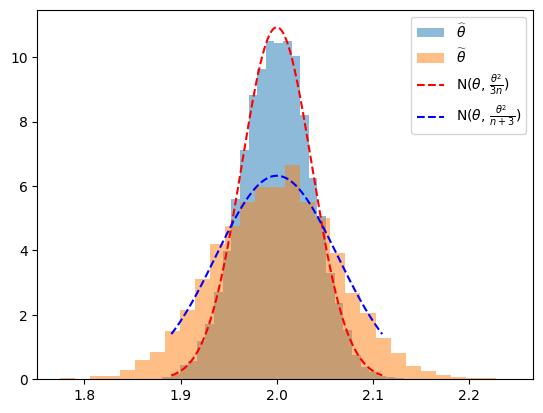

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

theta = 2
n = 1000
num_samples = 10000

samples = np.random.uniform(0, 2*theta, (num_samples, n))

theta_hat = np.mean(samples, axis=1)
theta_tilde = np.median(samples, axis=1)

var_hat = theta**2 / (3*n)
var_tilde = theta**2 / (n+3)

plt.hist(theta_hat, bins=30, density=True, alpha=0.5, label='$\\widehat\\theta$')
plt.hist(theta_tilde, bins=30, density=True, alpha=0.5, label='$\\widetilde\\theta$')

x = np.linspace(theta - 3*np.sqrt(var_hat), theta + 3*np.sqrt(var_hat), 1000)
plt.plot(x, norm.pdf(x, theta, np.sqrt(var_hat)), 'r--', label='N($\\theta$, $\\frac{\\theta^2}{3n}$)')
plt.plot(x, norm.pdf(x, theta, np.sqrt(var_tilde)), 'b--', label='N($\\theta$, $\\frac{\\theta^2}{n+3}$)')

plt.legend()
plt.show()
